In [33]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as plt_ticker

# Постановка задачи

Целью данной работы было проведение анализа сходимости к нормальному (Гауссовому) виду распределения выборочных средних, полученных на основе синтетического случайной величины, не являющейся нормально-распределенной. Данная синтетическая случайная величина будет представлять собой сумму двух независимых непрерывных случайных величин, имеющих различные виды распределения плотности вероятности.

В рамках данной работы выполняются следующие под-задачи:
<ol>
<li>Задать исходные данные для расчетов</li>
<li>Определить пространство исходов совместного распределения случайных величин X и Y, построить его график, а также определить области непрерывности пространства исходов</li>
<li>Определение функции (CDF) и плотности (PDF)  синтетического распределения Z=X+Y, причем X~Triang(0,2) и Y~Exp(0.25).</li>
<li>Верификация целостности расчета функции распределения плотности вероятности синтетической случайной величины</li>    
<li>Построение графиков функции вероятности и функции плотности распределиния вероятности</li>
<li>Генерация выборки для данного синтетического распределения Z объемом 10 000 элементов</li>
<li>Построение распределения выборочных средних объема 1, 3, 5, 7 элементов</li>
</ol>

<h3>1. Задание исходных данных для расчетов</h3>

Введем определение исходных распределений:

${Z=X + Y}, \quad 
{X \thicksim Triang\left(0,2\right)\quad Y \thicksim Exp\left(\frac{1}{4}\right) }
$

Случайные величины X и Y являются статистически независимыми и имеют следующие функции распределения плотности вероятности:

${f_x =
  \begin{cases}
    0    & , x < 0\\
    x    & , 0\leq x \leq 1\\
    2-x  & , 1\leq x \leq2\\
    0    & , 0 < x\\
  \end{cases}
} \quad \quad \quad \quad
$
${f_y = \frac{1}{4}\mathrm{e}^{-\frac{y}{4}} ,\quad y \in \left(0, +\infty \right) }
$

Графики плотности (PDF) данных распределений изображены ниже:

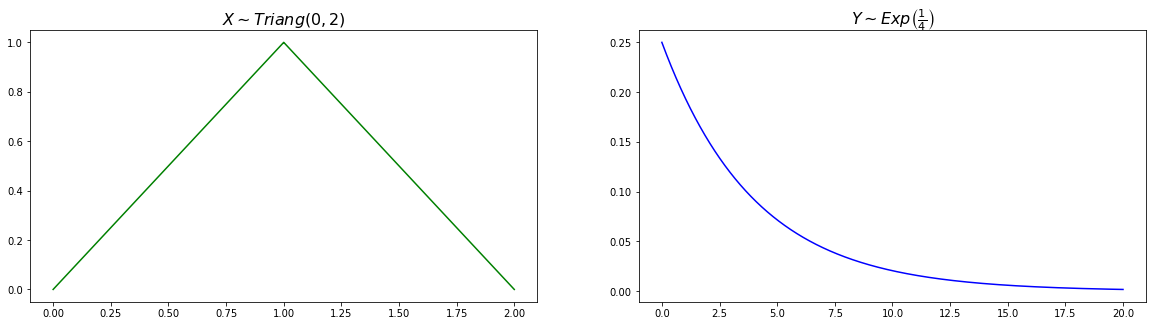

In [34]:
x_space= np.linspace(0,2,10000)
x_pdf = lambda x: 0 if x>2 else (x if 0<=x<=1 else 2-x)

fig, subplots = plt.subplots(1, 2)
fig.set_size_inches(20,5)

subplots[0].set_title(r"$X \sim Triang\left(0,2\right)$",fontdict= {"color":  "black","weight": "bold", "size": 16})
subplots[0].plot(x_space, map(x_pdf,x_space),"g-")

y_space= np.linspace(0,20,10000)
y_pdf = lambda y: 0.25*math.exp(-1*y*0.25)
subplots[1].set_title(r"$Y \sim Exp\left(\frac {1}{4} \right)$",fontdict= {"color":  "black","weight": "bold", "size": 16})
subplots[1].plot(y_space, map(y_pdf,y_space),"b-")
plt.show()

<h3>2. Определение пространства исходов ${\Omega}$ совместного распределения случайных величин X и Y</h3>



Теперь построим график совместного распределения данных случайных величин (обращаю внимание, что речь идет не о графике функции Z = X + Y, а о графике области совместного распределения X и Y):

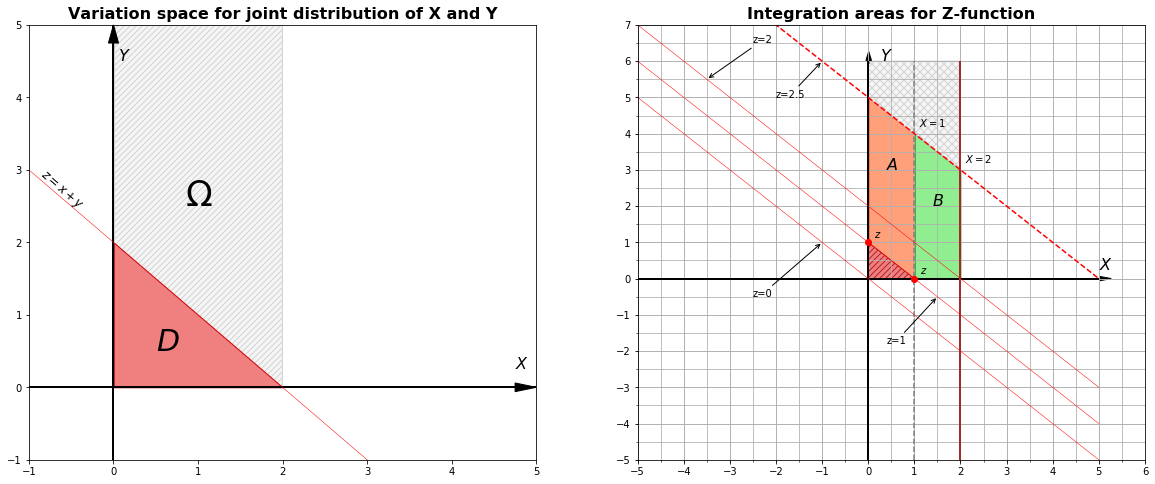

In [93]:
# Preparing the datasets to plot
x_space = np.linspace(-5,5,1000)
z_func = lambda z, x: z - x
z0_line = map (lambda x: z_func(0,x), x_space)
z1_line = map (lambda x: z_func(1,x), x_space)
z2_line = map (lambda x: z_func(2,x), x_space)
z5_line = map (lambda x: z_func(5,x), x_space)

# Preparing the canvas
fig = plt.figure(figsize=(20,8))
subplots = fig.subplots(1,2)

###########################################
### Plotting the mutual variation space ###
###########################################

subplots[0].set_title("Variation space for joint distribution of X and Y", fontdict= {"color":  "black","weight": "bold", "size": 16})
subplots[0].set_xlim(-1,5)
subplots[0].set_ylim(-1,5)
subplots[0].fill_between(x=x_space[500:700],
                         y1=np.full((1,200),5)[0],
                         y2=np.zeros(200),
                         facecolor="whitesmoke", 
                         edgecolor="lightgray", 
                         linewidth=1, 
                         hatch="////"
)

# Drawing X and Y axes with arrows
subplots[0].hlines(y=0, xmin=-1, xmax=5, linewidth = 2, color="k")
subplots[0].text(x=4.75, y=0.25, s="$X$", fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[0].vlines(x=0, ymin=-1, ymax=5, linewidth = 2, color="k")
subplots[0].text(x=0.05, y=4.5, s="$Y$", fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[0].arrow(x=4.7, y= 0, dx= 0.05, dy=0, width=0.002, color="k", clip_on=False, head_width=0.12, head_length=0.25)
subplots[0].arrow(x=0, y=4.65, dx=0, dy=0.1, width=0.002, color="k", clip_on=False, head_width=0.12, head_length=0.25)

subplots[0].plot(x_space, z2_line, "r-", linewidth=0.5)

subplots[0].fill_between(x=x_space[500:700], 
                         y1=z2_line[500:700],
                         y2= np.zeros(200), 
                         facecolor="lightcoral", 
                         edgecolor="firebrick", 
                         linewidth=1)

subplots[0].text(x=-0.9, y=2.9, s="$z = x  + y$", 
                 rotation=-41,
                 fontdict= {"color":  "black", "size": 12})

subplots[0].text(x=0.85, y=2.5, s="$\Omega$", fontdict= {"color":  "black","weight": "bold", "size": 35})
subplots[0].text(x=0.5, y=0.5, s="$D$", fontdict= {"color":  "black","weight": "bold", "size": 30})

############################################
### Plotting the integration areas graph ###
############################################

# Preparing the right subplot's canvas with title and coordinate system with limits(x=[-5,5]m y=[-5,7])
subplots[1].grid(which="both")
subplots[1].set_ylim(bottom=-5, top=7)
subplots[1].set_xlim(left=-5, right=6)

subplots[1].set_title("Integration areas for Z-function", fontdict= {"color":  "black","weight": "bold", "size": 16})

# Drawing X and Y axes with arrows
subplots[1].hlines(y=0, xmin=-5, xmax=5, linewidth = 2, color="k")
subplots[1].text(x=5, y=0.25, s="$X$", fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[1].vlines(x=0, ymin=-5, ymax=6, linewidth = 2, color="k")
subplots[1].text(x=0.25, y=6, s="$Y$", fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[1].arrow(x=4.92, y= 0, dx= 0.1, dy=0, width=0.002, color="k", clip_on=False, head_width=0.12, head_length=0.25)
subplots[1].arrow(x=0.01, y=5.92, dx=0, dy=0.1, width=0.002, color="k", clip_on=False, head_width=0.12, head_length=0.25)
    
# Setting major (width=1) and minor(width=0.5) ticks on both axes
major_ticks = plt_ticker.MultipleLocator(base=1.0)
minor_ticks = plt_ticker.MultipleLocator(base=0.5)
subplots[1].xaxis.set_minor_locator(minor_ticks)
subplots[1].xaxis.set_major_locator(major_ticks)
subplots[1].yaxis.set_minor_locator(minor_ticks)
subplots[1].yaxis.set_major_locator(major_ticks)

# Fill the integration areas
subplots[1].fill_between(x=x_space[500:600], 
                         y1=z5_line[500:600],
                         y2= np.zeros(100), 
                         facecolor="lightsalmon", 
                         edgecolor="orangered", 
                         linewidth=1)
subplots[1].text(x=0.375, y=3.0, s="$A$",fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[1].fill_between(x=x_space[600:700], 
                         y1=z5_line[600:700],
                         y2= np.zeros(100), 
                         facecolor="lightgreen", 
                         edgecolor="forestgreen", 
                         linewidth=1)
subplots[1].text(x=1.375, y=2.0, s="$B$",fontdict= {"color":  "black","weight": "bold", "size": 16})

# Drawing the Z functions as integration limits
subplots[1].plot(x_space, z0_line, "r-", linewidth=0.5)
subplots[1].annotate('z=0', xy=(-1, 1), xytext=(-2.5, -0.5), arrowprops=dict(facecolor="red", arrowstyle="->"), )

subplots[1].plot(x_space, z1_line, "r-", linewidth=0.5)
subplots[1].annotate('z=1', xy=(1.5, -0.5), xytext=(0.4, -1.8), arrowprops=dict(facecolor="red", arrowstyle="->"), )

subplots[1].plot(x_space, z2_line, "r-", linewidth=0.5)
subplots[1].annotate('z=2', xy=(-3.5, 5.5), xytext=(-2.5, 6.5), arrowprops=dict(facecolor="red", arrowstyle="->"), )

subplots[1].plot(x_space, z5_line, "r--", linewidth=1.5)
subplots[1].annotate('z=2.5', xy=(-1, 6), xytext=(-2, 5), arrowprops=dict(facecolor="red", arrowstyle="->"), )

# Drawing X integration limit
subplots[1].vlines(x=2, ymin=-5, ymax=6,  linewidth = 2, color="brown")
subplots[1].text(x=2.1, y=3.2, s="$X=2$")

subplots[1].vlines(x=1, ymin=-5, ymax=6,  linewidth = 1.5, color="gray", linestyles="dashed")
subplots[1].text(x=1.1, y=4.2, s="$X=1$")

# Drawing the integration area
subplots[1].fill_between(x=x_space[500:600], 
                         y1=z1_line[500:600],
                         y2= np.zeros(100), 
                         facecolor="lightcoral", 
                         edgecolor="firebrick", 
                         linewidth=1, hatch="////")

# Drawing the full mutual distribution area
subplots[1].fill_between(x=x_space[500:700], 
                 y1=z5_line[500:700],
                 y2= np.full((1,200),6)[0], 
                 facecolor="whitesmoke", 
                 edgecolor="lightgray", 
                 linewidth=1, 
                 hatch="xxx")


# Drowing the Z-plots for illustration the variable limits of integration
z_plots = ([0, 1], [1, 0])
subplots[1].plot(z_plots[0], z_plots[1], "ro")
subplots[1].text(x=0.125, y=1.125, s="$z$")
subplots[1].text(x=1.125, y=0.125, s="$z$")

# Finalizing the canvas to show
plt.show()

<h3>3. Определение CDF и PDF синтетиского распределения</h3>

На первом шаге необходимо дать определение функции распределения новой случайной величины Z.

Как видно из определения, область определения функции вероятнос
ти $F_z(z)$ представляет собой пересейчение двух множеств: $\Omega$ и $\left\{x,y:x+y<z\right\}$ при некотором заданном z.
<p>Таким образом, функция вероятности суммы двух <u><i>независимых случайных величин</i></u> может быть выражена следующей формулой, где D - область определения функциии $F_z$

$F_{z} \left( z\right)=P\left(Z<z\right)=P\left(X+Y<z \space | \space X=x, Y=y\right)=\iint_D{f_{xy}(x,y)} dD, 
\quad f_{xy}\left(x, y\right) = f_{x}\left(x\right)f_{y}\left(y\right)
$

Заметим, что функция распределения случайной величины Y непрпрерывна на всем интервале $\left(0, +\infty \right)$, в то время, как функция плотности распределения случайной величины X имеет два интервала непрерывности (помимо интервалов, на которых она тождественно равна нулю), а именно: $\left(0 \leq x \leq 1 \right) , \space \left(1 \leq x \leq 2 \right)$. 

<p>Исходя из этого, выделим следующие области интегрирования, на которых функции плотности распределения обеих случайных величин обладают свойством непрерывности:  $ D = A \space \left\{x,y: x \in (0,1), y \in (0,+\infty)\right\} \bigcup B \space \left\{x,y: x \in (1,2), y \in (0,+\infty)\right\} $ (см. рис. выше). 

С учетом этого, функция плотности совместного распределения X и Y имеет следующее определение:

$
f_{xy} (X=x, Y=y) = \begin{cases}
\frac{x}{4}\mathrm{e}^{-\frac{y}{4}}, D\left\{x,y: x \in (0,1), y \in (0,+\infty)\right\}\\
\frac{2-x}{4}\mathrm{e}^{-\frac{y}{4}}, D\left\{x,y: x \in (1,2), y \in (0,+\infty)\right\}\\
0, D\left\{x,y: x \notin (1,2), y < 0)\right\}\\
\end{cases}
$

Вычислим значение функции вероятности синтетитческого распределения Z, поспользовавшись интегрированием функции плотности совместного распределения по области D:

$$
F_{z} = \begin{cases}
\int_0^z\mathrm{d}x \int_0^{\left( z-x \right)} \left( \frac{x}{4}\mathrm{e}^{-\frac{y}{4}} \right) \mathrm{d}y,       & 0 \leq z \leq 1\\
{\int_0^1\mathrm{d}x \int_0^{\left( z-x \right)} \left( \frac{x}{4}\mathrm{e}^{-\frac{y}{4}} \right)\mathrm{d}y} 
+ {\int_1^z\mathrm{d}x \int_0^{\left( z-x \right)} \left( \frac{2-z}{4}x\mathrm{e}^{-\frac{y}{4}} \right) \mathrm{d}y}, & 1 \leq z \leq 2 \\
{\int_0^1\mathrm{d}x \int_0^{\left( z-x \right)} \left( \frac{x}{4}\mathrm{e}^{-\frac{y}{4}} \right) \mathrm{d}y} + 
{\int_1^2\mathrm{d}x \int_0^{\left( z-x \right)} \left( \frac{2-z}{4}x\mathrm{e}^{-\frac{y}{4}} \right) \mathrm{d}y},  & z > 2 \\
\end{cases}
\quad = \quad
\begin{cases}
{\frac{z^2}{2}-4\left(z+4\mathrm{e}^{-\frac{z}{4}} - 4\right)},                             & 0 \leq z \leq 1\\
{6z - \frac{z^2}{2}+32\mathrm{e}^{\frac {1-z}{4}}-16\mathrm{e}^{\frac{-z}{4}}-25},          & 1 \leq z \leq 2 \\
{32\mathrm{e}^{\frac{1-z}{4}}-16\mathrm{e}^{\frac{2-z}{4}}-16\mathrm{e}^{-\frac{z}{4}}+1},  & z > 2 \\
\end{cases}
$$

Для вычисления функции плотности распреления вероятности синтетической случайной величины Z, проведем дифференцирование полученной функции вероятности по переменной z следующим образом:

$
{f_x =
  \begin{cases}
	\frac{\mathrm{d}}{\mathrm{d}z} \left(\frac{z^2}{2}-4\left(z+4\mathrm{e}^{-\frac{z}{4}} - 4\right) \right), & 0 \leq z \leq 1 \\
	\frac{\mathrm{d}}{\mathrm{d}z} \left( {6z - \frac{z^2}{2}+32\mathrm{e}^{\frac{1-z}{4}}-16\mathrm{e}^{\frac{-z}{4}}-25 }\right), & 1 \leq z \leq 2 \\
	\frac{\mathrm{d}}{\mathrm{d}z} \left({32\mathrm{e}^{\frac{1-z}{4}}-16\mathrm{e}^{\frac{2-z}{4}}-16\mathrm{e}^{-\frac{z}{4}}+1} \right), & z > 2 \\
  \end{cases}
} \quad = \quad 
\begin{cases}
	{z + 4 \mathrm{e}^{-\frac{z}{4}} - 4},  & 0 \leq z \leq 1 \\
	{6-z + 4\mathrm{e}^{-\frac{z}{4}} - 8\mathrm{e}^{\frac{1-z}{4}}}, & 1 \leq z \leq 2 \\
	{4 \left(  \mathrm{e}^{\frac{1}{4}} - 1 \right )^2 \mathrm{e}^{-\frac{z}{4}}}, & z > 2 \\
\end{cases}
$

<b>ВАЖНО!</b> Подробности проведенных вычислений приведены в следующих ссылках:

$0 \leq z \leq 1: F_{z} = $ https://www.wolframalpha.com/input/?i=double+integral&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend2%22%7D+-%3E%22z-x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend1%22%7D+-%3E%22z%22&assumption=%7B%22C%22%2C+%22double+integral%22%7D+-%3E+%7B%22Calculator%22%7D&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22integrand%22%7D+-%3E%22%28x%2F4%29*exp%28%28-y%29%2F4%29%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable1%22%7D+-%3E%22x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart1%22%7D+-%3E%220%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable2%22%7D+-%3E%22y%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart2%22%7D+-%3E%220%22

График функции на участке - https://www.wolframalpha.com/input/?i=plot+z%5E2%2F2+-+4z-16*exp%28-z%2F4%29%2B16%2C+0%3Cz%3C1

$1 \leq z \leq 2: F_{z} = $ 

а) https://www.wolframalpha.com/input/?i=double+integral&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend2%22%7D+-%3E%22z-x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend1%22%7D+-%3E%221%22&assumption=%7B%22C%22%2C+%22double+integral%22%7D+-%3E+%7B%22Calculator%22%7D&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22integrand%22%7D+-%3E%22%28x%2F4%29*exp%28%28-y%29%2F4%29%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable1%22%7D+-%3E%22x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart1%22%7D+-%3E%220%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable2%22%7D+-%3E%22y%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart2%22%7D+-%3E%220%22

б)  https://www.wolframalpha.com/input/?i=double+integral&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend2%22%7D+-%3E%22z-x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend1%22%7D+-%3E%22z%22&assumption=%7B%22C%22%2C+%22double+integral%22%7D+-%3E+%7B%22Calculator%22%7D&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22integrand%22%7D+-%3E%22%28%282-x%29%2F4%29*exp%28-y%2F4%29%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable1%22%7D+-%3E%22x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart1%22%7D+-%3E%221%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable2%22%7D+-%3E%22y%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart2%22%7D+-%3E%220%22  

График функции вероятности на участке - <a href = "https://www.wolframalpha.com/input/?i=plot+6z+-+z%5E2%2F2%2B32exp%28%281-z%29%2F4%29-16*exp%28-z%2F4%29-25%2C+1<z<2"> https://www.wolframalpha.com/input/?i=plot+6z+-+z%5E2%2F2%2B32exp%28%281-z%29%2F4%29-16*exp%28-z%2F4%29-25%2C+1<z<2 </a>

Расчет плотности -  https://www.wolframalpha.com/input/?i=differentiate+6z+-+z%5E2%2F2%2B32exp%28%281-z%29%2F4%29-16*exp%28-z%2F4%29-25

График плотности - https://www.wolframalpha.com/input/?i=plot+-z+%2B+4+e%5E%28-z%2F4%29+-+8+e%5E%28%281+-+z%29%2F4%29+%2B+6%2C+1%3Cz%3C2


$z > 2: F_{z} = $ 

a) https://www.wolframalpha.com/input/?i=double+integral&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend2%22%7D+-%3E%22z-x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend1%22%7D+-%3E%221%22&assumption=%7B%22C%22%2C+%22double+integral%22%7D+-%3E+%7B%22Calculator%22%7D&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22integrand%22%7D+-%3E%22%28x%2F4%29*exp%28%28-y%29%2F4%29%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable1%22%7D+-%3E%22x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart1%22%7D+-%3E%220%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable2%22%7D+-%3E%22y%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart2%22%7D+-%3E%220%22

б) https://www.wolframalpha.com/input/?i=double+integral&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend2%22%7D+-%3E%22z-x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend1%22%7D+-%3E%222%22&assumption=%7B%22C%22%2C+%22double+integral%22%7D+-%3E+%7B%22Calculator%22%7D&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22integrand%22%7D+-%3E%22%28%282-x%29%2F4%29*exp%28%28-y%29%2F4%29%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable1%22%7D+-%3E%22x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart1%22%7D+-%3E%221%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable2%22%7D+-%3E%22y%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart2%22%7D+-%3E%220%22

График функции на участке - https://www.wolframalpha.com/input/?i=plot+%284*%283*exp%281%2F4%29-4%29*exp%28-z%2F4%29%2B1%2F2%29%2B%2820*exp%28%281-z%29%2F4%29-16*exp%28%282-z%29%2F4%29%2B1%2F2%29%2C+2%3Cz%3C10

Расчет плотности - https://www.wolframalpha.com/input/?i=differentiate+32*exp%28%281-z%29%2F4%29-16*exp%28%282-z%29%2F4%29-16*exp%28-z%2F4%29%2B1

График плотности - https://www.wolframalpha.com/input/?i=plot+4*%28-1+%2B+e%5E%281%2F4%29%29%5E2+e%5E%28-z%2F4%29%2C+2%3Cz%3C10

<h3>4.Верификация целостности расчета функции распределения плотности вероятности синтетической случайной величины</h3>

Перед тем, как продолжить работу, необходимо убедиться, что функция плотности вероятности корректно определена на всей числовой приямой: $ \int_{-\infty}^{+\infty}{f_{z}\left(z\right)} \space \mathrm{d}z \equiv 1 $

Поскольку функция плотности $f_{z}\left(z\right)$ определена на 3-х интервалах (на остальной части числовой прямой функция тождественно равна нулю), нам для проверки необходимо проинтегрировать ее на каждом из интервалов и сложить полученные результаты:

$
\int_{0}^{1} {\left( z + 4 \mathrm{e}^\frac{-z}{4} - 4 \right)}  \space \mathrm{d}z \space +
\int_{1}^{2} {\left(6 - z + 4 \mathrm{e}^\frac{-z}{4} - 8 \mathrm{e}^\frac{1-z}{4} \right) }  \space \mathrm{d}z \space +
\int_{2}^{+\infty} {\left( 4 \left(\mathrm{e}^\frac{1}{4}-1\right)^2 \mathrm{e}^\frac{-z}{4} \right)} \space \mathrm{d}z \space 
=
\frac{25}{2} - \frac{16}{\mathrm{e}^{\frac{1}{4}}} - \frac{55}{2} - \frac{16}{\mathrm{e}^{\frac{1}{2}}} + \frac{48}{\mathrm{e}^{\frac{1}{4}}} + 16 \frac{(\mathrm{e}^{\frac{1}{4}}-1)^2}{\mathrm{e}^{\frac{1}{2}}}\equiv1
$

<b>ВАЖНО!</b> Подробности проведенных вычислений приведены в следующих ссылках:

a) $0 \leq z \leq 1: $ https://www.wolframalpha.com/input/?i=integral+z%2B4*exp%28-z%2F4%29-4+from+0+to+1

б) $1 \leq z \leq 2: $ https://www.wolframalpha.com/input/?i=integral+6+-z+%2B+4+e%5E%28-z%2F4%29+-+8+e%5E%28%281+-+z%29%2F4%29+from+1+to+2

в) $ z > 2: $ https://www.wolframalpha.com/input/?i=integral+4*%28-1+%2B+e%5E%281%2F4%29%29%5E2+e%5E%28-z%2F4%29+from+2+to+infinity

Суммирование по интервалам - https://www.wolframalpha.com/input/?i=25%2F2+-+16%2Fe%5E%281%2F4%29+%2B+-55%2F2+-+16%2Fsqrt%28e%29+%2B+48%2Fe%5E%281%2F4%29+%2B+%2816+%28e%5E%281%2F4%29+-+1%29%5E2%29%2Fsqrt%28e%29

<h3>5.Построение графиков функции вероятности и функции плотности вероятности</h3>

Построим график основных показателей синтетической случайной величины Z:

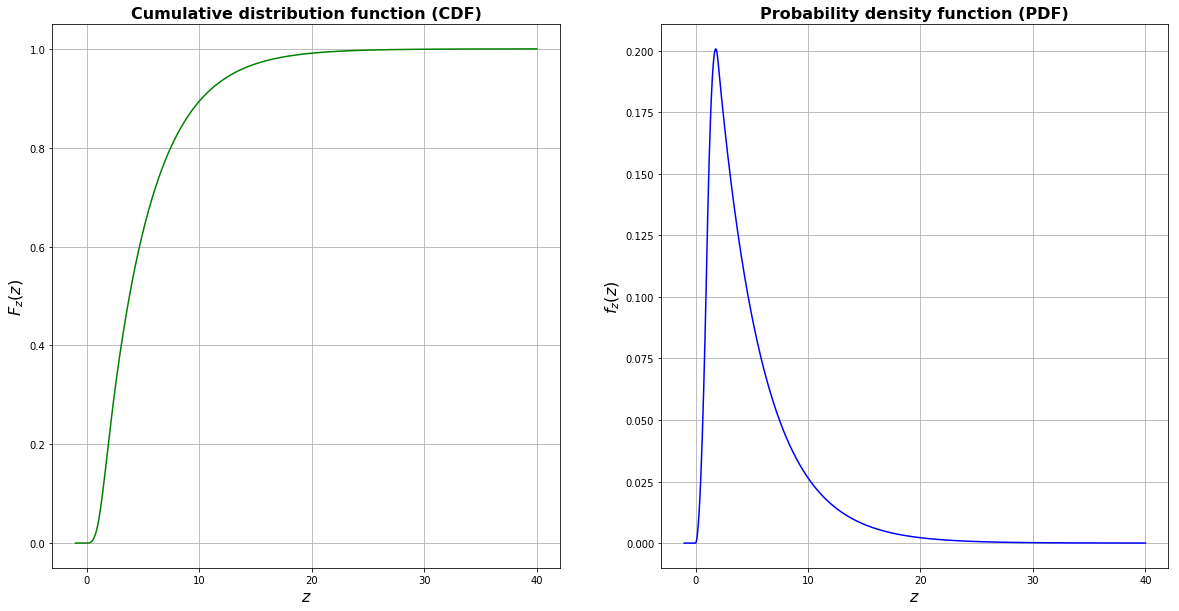

In [131]:
def z_CDF(z):
    if z<0:
        return 0
    if 0<=z<=1:
        return 0.5*z**2 - 4*z-16.*math.exp(-0.25*z)+16.
    if 1<=z<=2:
        return 6.*z - 0.5*z**2.+32.*math.exp(0.25*(1.-z))-16*math.exp(-0.25*z)-25.
    if z>2:
        return 32.*math.exp(0.25*(1.-z))-16.*math.exp(0.25*(2.-z))-16.*math.exp(-0.25*z)+1.

    
def z_PDF(z):
    if z<0:
        return 0
    if 0<=z<=1:
        return z+4.*math.exp(-0.25*z)-4.
    if 1<=z<=2:
        return -z + 4*math.exp(-0.25*z) - 8*math.exp(0.25*(1 - z)) + 6.
    if z>2:
        return 4*(-1 + math.exp(0.25))**2*math.exp(-0.25*z)
    
x_space = np.linspace(-1,40,1000)

fig, subplots = plt.subplots(1,2)
fig.set_size_inches(20,10)

subplots[0].grid(which="both")
subplots[0].set_title("Cumulative distribution function (CDF)",
                     fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[0].set_xlabel("${z}$", fontdict= {"color":  "black","weight": "bold", "size": 16})
subplots[0].set_ylabel("$F_{z}(z)$", fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[0].plot(x_space, map(z_CDF, x_space), "g-")

subplots[1].grid(which="both")
subplots[1].set_title("Probability density function (PDF)",
                     fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[1].set_xlabel("${z}$", fontdict= {"color":  "black","weight": "bold", "size": 16})
subplots[1].set_ylabel("$f_{z}(z)$", fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[1].plot(x_space, map(z_PDF, x_space), "b-")

plt.show()

<h3>6.Генерация выборки для данного синтетического распределения Z объемом 10 000 элементов</h3>

Сгенерируем выборку величины 10 000 элементов на основании полученной функции плотности вероятности синтетической случайной величины Z:


In [ ]:
import scipy.stats as st

class Z_SyntheticRV(st.rv_continuous):
    def _pdf(self,x):
        return z_PDF(x)
    
z_rv = Z_SyntheticRV(a=0., b=1., name='Z_SyntheticRV')
z_rv.rvs(size=100)

In [ ]:
z_PDF(10)